**The two basic types of regression are simple linear regression and multiple linear regression, although there are nonlinear regression methods for more complicated data and analysis. Simple linear regression uses one independent variable to explain or predict the outcome of the dependent variable Y, while multiple linear regression uses two or more independent variables to predict the outcome. Analysts can use stepwise regression to examine each independent variable contained in the linear regression model.**

The dataset has columns corresponding to:

• crim: Per capita crime rate by town.

• zn: Proportion of large residential lots (over 25,000 sq. ft.).

• indus: Proportion of non-retail business acres per town.

• Chas: Binary variable indicating if the property is near Charles River (1
for yes, 0 for no).

• nox : Concentration of nitrogen oxides in the air.

• rm: Average number of rooms per dwelling.

• age: Proportion of old owner-occupied units built before 1940.

• dis: Weighted distances to Boston employment centers.

• rad: Index of accessibility to radial highways.

• tax : Property tax rate per $ 10,000.

In [1]:
# Now starting with STEP 1: DATA PREPARATION

import pandas as pd # to deal with the csv data
import matplotlib.pyplot as plt  # Visualize the results

import sklearn # for machine learning algorithms
from sklearn.model_selection import train_test_split

from google.colab import drive
drive.mount('/content/drive')
data = pd.read_csv('/content/drive/MyDrive/BostonHousing.csv')
x = data.drop('tax', axis=1)[['indus']] # Features
y = data['tax']  # Target variable

# CLEAN THE DATA
# After printing we came to know that there are 5 missing rm values.
data = data.dropna() # Drop rows with missing values (if any)
print(data.isnull().sum())

x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size=0.2, random_state=49)
# 20% of the data will be used for testing
# ensures that the random processes in machine learning (like data splitting) produce the same results every time you run the code.

Mounted at /content/drive
crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64


Mean Squared Error: 12201.555217332896
Root Mean Squared Error: 110.46065008559789
R-squared: 0.5556387052838814


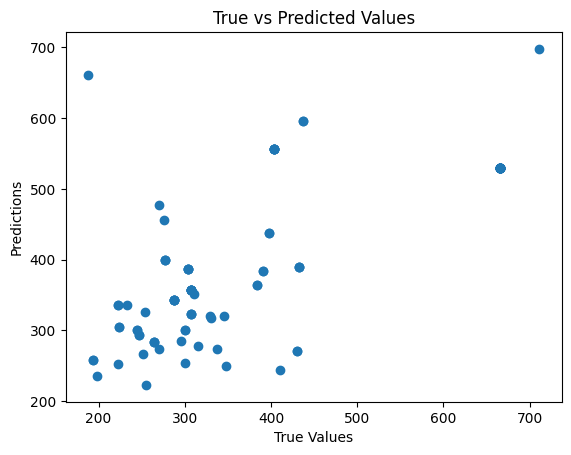

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# STEP 2: MODEL IMPLEMENTATION
model = LinearRegression()
model.fit(x_train, y_train)

# STEP 3: MODEL EVALUATION

y_pred = model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared: {r2}")

plt.scatter(y_test, y_pred)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("True vs Predicted Values")
plt.show()

Ridge R-squared: 0.5556343846542898
Ridge MSE: 12201.673855929826
Ridge RMSE: 110.46118710175908
Ridge Coefficients: [17.42296447]




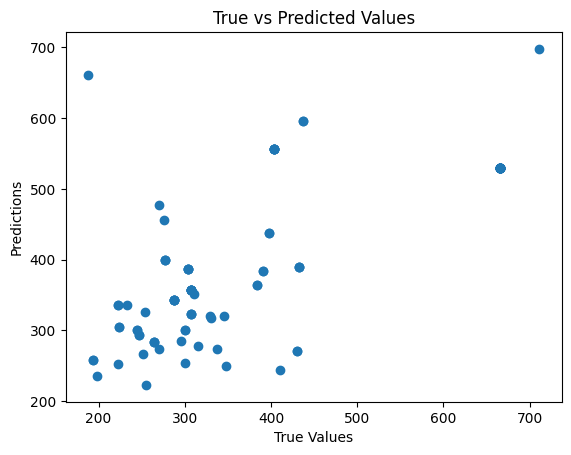

Lasso R-squared: 0.555628682854142
Lasso MSE: 12201.830419586853
Lasso RMSE: 110.461895781246
Lasso Coefficients: [17.42178017]




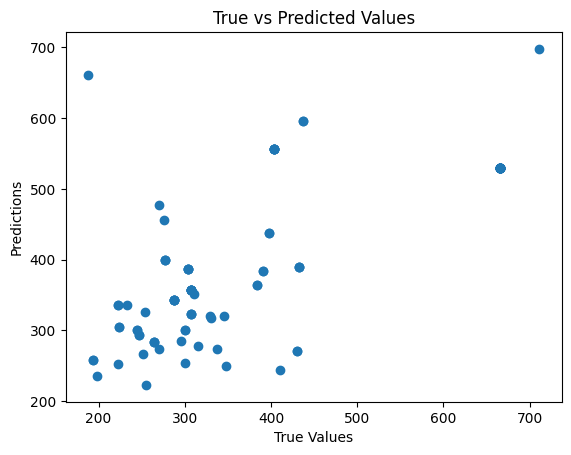

In [5]:
from sklearn.linear_model import Ridge, Lasso
# Ridge Regression
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(x_train, y_train)
ridge_pred = ridge_model.predict(x_test)
print(f"Ridge R-squared: {r2_score(y_test, ridge_pred)}")
mse = mean_squared_error(y_test, ridge_pred) # Calculate MSE first
print(f"Ridge MSE: {mse}")
rmse = np.sqrt(mse)  # Calculate RMSE manually using NumPy
print(f"Ridge RMSE: {rmse}")
print(f"Ridge Coefficients: {ridge_model.coef_}")
print("\n")
plt.scatter(y_test, ridge_pred)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("True vs Predicted Values")
plt.show()

# Lasso Regression
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(x_train, y_train)
lasso_pred = lasso_model.predict(x_test)
print(f"Lasso R-squared: {r2_score(y_test, lasso_pred)}")
print(f"Lasso MSE: {mean_squared_error(y_test, lasso_pred)}")
# Calculate RMSE manually using NumPy
mse_lasso = mean_squared_error(y_test, lasso_pred)
rmse_lasso = np.sqrt(mse_lasso)
print(f"Lasso RMSE: {rmse_lasso}")

print(f"Lasso Coefficients: {lasso_model.coef_}")
print("\n")
plt.scatter(y_test, lasso_pred)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("True vs Predicted Values")
plt.show()

We are using Lasso model as it  is better suited for feature selection.